# Mencari Akar Persamaan Non-Linear Satu Variabel

Diberikan suatu fungsi bernilai real dan nonlinear $f(x)$. Cari suatu akar $p$ dari $f(x)$ sedemikian sehingga $f(p)=0$.

__Contoh 1__: Polinomial kuadratik: $f(x)=x^2+5x+6$.
$𝑓(x)=(x+2)(x+3)=0⇒p_1=−2, p_2=−3$.

__Contoh 2__: $f(x)=x^2+4x+10=(x+2)^2+6$.
Tidak ada akar $𝑝$ bernilai real yang memenuhi $f(p)=0$.

__Contoh 3__: $f(x)=x^2+\cos⁡{x}+e^x+\sqrt{x+1}$.
Akar bisa saja sulit untuk ditemukan secara analitik.

__Fokus__: menggunakan metode numerik untuk mengaproksimasi akar.


In [70]:
import matplotlib.pyplot as plt
import numpy as np

## Metode Bisection

Diberikan $f(x)$ kontinu di interval $[a,b]$ dengan $f(a)$ dan $f(b)$ memiliki tanda yang berlawanan.
Tujuan: Cari $a,b$ sedemikian sehingga $f(a).f(b)<0$. Ini berarti terdapat akar $p∈(a,b)$ sedemikian sehingga $f(r)=0$.

Misalkan $c=(a+b)/2$, titik tengah.
Jika $f(c)=0$, selesai.
Jika tidak, periksa jika $f(c).f(c)<0$ atau $f(c).f(c)<0$.
Pilih interval $[a,c]$ atau $[c,b]$, dan ulangi prosedur ini sampai memenuhi kriteria pemberhentian.

Kriteria Pemberhentian:
* Interval cukup kecil
* $|f(c_n )|$ hampir $0$
* Sudah mencapai iterasi maksimum
* Kombinasi dari yang di atas.

__Contoh 1__:

Diberikan $f(x) = x^3 + 4x^2 - 10$. Cari akar dari $f(x)$ di interval $[1,2]$ menggunakan metode Bisection dengan $\varepsilon = 10^{-4}$

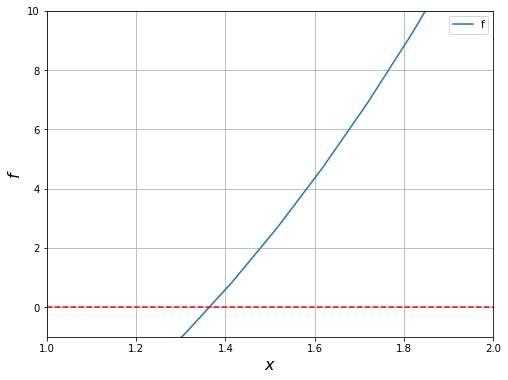

In [71]:
x = np.linspace(0, 10, 100)
fungsi = x**3 + 4*x**2 - 10.
g = np.zeros(x.size)

plt.figure(figsize=(8,6))
plt.plot(x, fungsi, x, g, 'r--')
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$f$", fontsize=16)
plt.ylim([-1., 10])
plt.xlim([1., 2.])
plt.grid()
plt.legend("f", loc='best');

In [72]:
def bisection(func, a, b, epsilon=1e-4, N=1000):
    f = func
    FA = f(a)
    for i in range(N):
        p = a + (b-a)/2
        FP = f(p)
        print("iterasi {:2d}\t p = {:2.4f}\t f(p) = {:2.4f}\t a = {:2.4f}\t b = {:2.4f}".format(i, p, FP, a, b))
        if np.abs(FP) <= epsilon or (b-a)/2 <= epsilon:
            break
        else:
            if FA*FP > epsilon:
                a = p
                FA = FP
            else:
                b = p
    return p,FP,a,b,i

In [73]:
f = lambda x: x**3 + 4*x**2 - 10
hasil = bisection(f, a=1, b=2, epsilon=1e-4, N=100)
print("p = {}, f(p) = {}, a = {}, b = {}, Total iterasi = {}".format(hasil[0], hasil[1], hasil[2], hasil[3], hasil[4]+1))

iterasi  0	 p = 1.5000	 f(p) = 2.3750	 a = 1.0000	 b = 2.0000
iterasi  1	 p = 1.2500	 f(p) = -1.7969	 a = 1.0000	 b = 1.5000
iterasi  2	 p = 1.3750	 f(p) = 0.1621	 a = 1.2500	 b = 1.5000
iterasi  3	 p = 1.3125	 f(p) = -0.8484	 a = 1.2500	 b = 1.3750
iterasi  4	 p = 1.3438	 f(p) = -0.3510	 a = 1.3125	 b = 1.3750
iterasi  5	 p = 1.3594	 f(p) = -0.0964	 a = 1.3438	 b = 1.3750
iterasi  6	 p = 1.3672	 f(p) = 0.0324	 a = 1.3594	 b = 1.3750
iterasi  7	 p = 1.3633	 f(p) = -0.0321	 a = 1.3594	 b = 1.3672
iterasi  8	 p = 1.3652	 f(p) = 0.0001	 a = 1.3633	 b = 1.3672
p = 1.365234375, f(p) = 7.202476263046265e-05, a = 1.36328125, b = 1.3671875, Total iterasi = 9


__Contoh 2__:

Diberikan $f(x) = x^2 + 4x - 4$. Cari akar dari $f(x)$ di interval $[0,5]$ menggunakan metode Bisection dengan $\varepsilon = 10^{-4}$

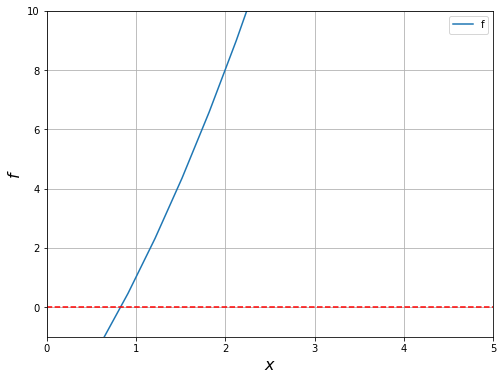

In [74]:
x = np.linspace(-20, 10, 100)
fungsi = x**2 + 4*x - 4.
g = np.zeros(x.size)

plt.figure(figsize=(8,6))
plt.plot(x, fungsi, x, g, 'r--')
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$f$", fontsize=16)
plt.ylim([-1., 10])
plt.xlim([0, 5])
plt.grid()
plt.legend("f", loc='best');

In [75]:
f = lambda x: x**2 + 4*x - 4
hasil = bisection(f, a=0, b=5, epsilon=1e-4, N=100)
print("p = {}, f(p) = {}, a = {}, b = {}, Total iterasi = {}".format(hasil[0], hasil[1], hasil[2], hasil[3], hasil[4]+1))

iterasi  0	 p = 2.5000	 f(p) = 12.2500	 a = 0.0000	 b = 5.0000
iterasi  1	 p = 1.2500	 f(p) = 2.5625	 a = 0.0000	 b = 2.5000
iterasi  2	 p = 0.6250	 f(p) = -1.1094	 a = 0.0000	 b = 1.2500
iterasi  3	 p = 0.9375	 f(p) = 0.6289	 a = 0.6250	 b = 1.2500
iterasi  4	 p = 0.7812	 f(p) = -0.2646	 a = 0.6250	 b = 0.9375
iterasi  5	 p = 0.8594	 f(p) = 0.1760	 a = 0.7812	 b = 0.9375
iterasi  6	 p = 0.8203	 f(p) = -0.0458	 a = 0.7812	 b = 0.8594
iterasi  7	 p = 0.8398	 f(p) = 0.0647	 a = 0.8203	 b = 0.8594
iterasi  8	 p = 0.8301	 f(p) = 0.0093	 a = 0.8203	 b = 0.8398
iterasi  9	 p = 0.8252	 f(p) = -0.0183	 a = 0.8203	 b = 0.8301
iterasi 10	 p = 0.8276	 f(p) = -0.0045	 a = 0.8252	 b = 0.8301
iterasi 11	 p = 0.8264	 f(p) = -0.0114	 a = 0.8252	 b = 0.8276
iterasi 12	 p = 0.8270	 f(p) = -0.0079	 a = 0.8264	 b = 0.8276
iterasi 13	 p = 0.8267	 f(p) = -0.0096	 a = 0.8264	 b = 0.8270
iterasi 14	 p = 0.8269	 f(p) = -0.0088	 a = 0.8267	 b = 0.8270
iterasi 15	 p = 0.8268	 f(p) = -0.0092	 a = 0.8267	 b = 0.82

### Analisis Kekonvergenan Metode Bisection

Diberikan suatu fungsi nonlinear $f(x)$ kontinu di $[a,b]$ dan $\text{sgn}(f(a)) \neq \text{sgn}(f(b))$. Kita misalkan $a_0 = a$ dan $b_0=b$ sebagai interval pada iterasi ke 0 dari metode bisection, sehingga terdapat $c_0 = \frac{a_0+b_0}{2}$ adalah nilai tengah dari $[a_0, b_0]$. Maka kita definisikan error untuk iterasi ke-0 dari metode bisection, yaitu:

$$e_0 = |p-c_0| \leq \frac{b_0 - a_0}{2},$$

dimana $p$ adalah akar dari $f(x)$. Kemudian kita tuliskan $c_n = \frac{a_n + b_n}{2}$ adalah nilai tengah dari $[a_n, b_n]$ pada iterasi ke-$n$, maka error yang dihasilkannya adalah

$$e_n = |p-c_n| \leq \frac{b_n - a_n}{2} = \frac{b_0 - a_0}{2}\cdot \frac{1}{2^n}.$$

Jika diberikan toleransi error $\varepsilon \rightarrow 0$, maka haruslah $e_n \leq \varepsilon$. Sehingga

$$e_n \leq \frac{b_0 - a_0}{2}\cdot \frac{1}{2^n} \leq \varepsilon.$$

Jadi, iterasi minimum yang dibutuhkan metode bisection untuk konvergen ke solusi (akar) adalah

```{admonition} Iterasi Minimum Bisection
$$n \geq \frac{\log{(b-a)} - \log{2\varepsilon}}{\log{2}}.$$
```


__Contoh 3__

Dari contoh 2, kita ingin melihat berapa iterasi minimum yang dibutuhkan metode bisection untuk mendapatkan akar/solusi menggunakan analisis kekonvergenan yang sudah dituliskan sebelumnya.

__Jawaban__:

$n \geq \frac{\log{(5-0)} - \log{2\cdot 10^{-4}}}{\log{2}}$

$\Rightarrow n \geq \frac{4.398}{0.301} = 14.611 \approx 14.$

Jadi iterasi minimum yang dibutuhkan adalah 14 iterasi.



## Iterasi Fixed Point

__Definisi__: Suatu bilangan $p$ adalah __fixed point__ untuk suatu fungsi $g$ jika $g(p) = p$. Diberikan suatu fungsi $f(x)$ kontinu, untuk suatu $p$ maka $f(p) = 0$. Kemudian kita definisikan fungsi $g$ dan kita tuliskan
$$
\begin{array}{cc}
  x = x + f(x) = g(x) &  & x=x-f(x)=g(x)
\end{array}
$$
* Terdapat akar $p = g(p)$, dimana $p$ adalah fixed point. Kemudian dengan tebakan awal $x_0$, hitung $g(x_0)$, dan harapannya untuk setiap iterasi $x_k = g(x_{k-1})$ menuju ke $p$.
* Stopping criteria:
  * $|x_k - x_{k-1}| \leq \varepsilon$ atau $|g(x_k) - x_{k-1}| \leq \varepsilon$
  * Iterasi maksimum terpenuhi.


In [76]:
def iterasi_fixed_point(func, p0, N=100, epsilon=1e-5):
    print('     p\t\t     g(p)      \tresidual')
    print('------------------------------------------------')
    g = func
    for i in range(N):
        p = g(p0)
        if (np.abs(p-p0) < epsilon):
            break    
        print('{:8.4f}\t{:10.4f}\t{:10.4f}\t'.format(p, g(p), np.abs(p-p0)))
        p0 = p
    return p

### Contoh 1
Carilah akar dari $f(x)=x−\cos{⁡(x)}$ dengan akurasi 4-digit

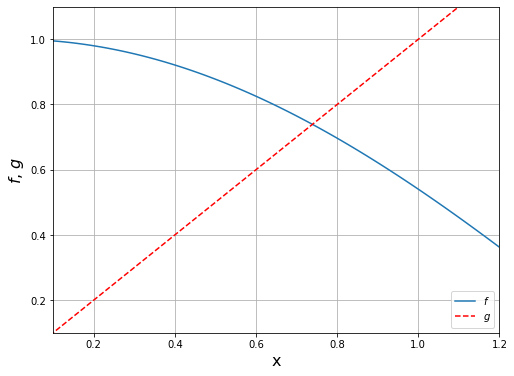

In [77]:
x = np.linspace(0, 1.2, 100)
g = np.cos(x)

plt.figure(figsize=(8,6))
plt.plot(x, g, x, x, 'r--')
plt.xlabel('x', fontsize=16)
plt.ylabel("$f$, $g$", fontsize=16)
# plt.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
plt.ylim([0.1, 1.1])
plt.xlim([0.1, 1.2])
plt.grid()
plt.legend(["$f$", "$g$"], loc='best');

In [78]:
g = lambda x: np.cos(x)
iterasi_fixed_point(g, p0=0)

     p		     g(p)      	residual
------------------------------------------------
  1.0000	    0.5403	    1.0000	
  0.5403	    0.8576	    0.4597	
  0.8576	    0.6543	    0.3173	
  0.6543	    0.7935	    0.2033	
  0.7935	    0.7014	    0.1392	
  0.7014	    0.7640	    0.0921	
  0.7640	    0.7221	    0.0626	
  0.7221	    0.7504	    0.0419	
  0.7504	    0.7314	    0.0283	
  0.7314	    0.7442	    0.0190	
  0.7442	    0.7356	    0.0128	
  0.7356	    0.7414	    0.0086	
  0.7414	    0.7375	    0.0058	
  0.7375	    0.7401	    0.0039	
  0.7401	    0.7384	    0.0026	
  0.7384	    0.7396	    0.0018	
  0.7396	    0.7388	    0.0012	
  0.7388	    0.7393	    0.0008	
  0.7393	    0.7389	    0.0005	
  0.7389	    0.7392	    0.0004	
  0.7392	    0.7390	    0.0002	
  0.7390	    0.7391	    0.0002	
  0.7391	    0.7391	    0.0001	
  0.7391	    0.7391	    0.0001	
  0.7391	    0.7391	    0.0001	
  0.7391	    0.7391	    0.0000	
  0.7391	    0.7391	    0.0000	
  0.7391	    0.7391	    0.0000	
  0.7391	    0.7391	  

### Contoh 2

Selesaikan $f(x)=e^{-2x}\cdot (x-1)$

Kita pilih: $g(x) = e^{-2x}\cdot (x-1) + x$

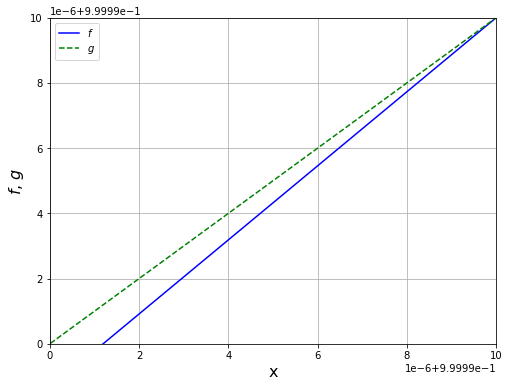

In [79]:
x = np.linspace(0.1, 1., 1000)
f = np.exp(-2*x) * (x-1)
g = np.exp(-2*x) * (x-1) + x

plt.figure(figsize=(8, 6))
plt.plot(x, g, 'b', x, x, 'g--')
plt.xlabel('x', fontsize=16)
plt.ylabel("$f$, $g$", fontsize=16)
plt.ylim([0.99999, 1.0])
plt.xlim([0.99999, 1.0])
plt.grid()
plt.legend(["$f$", "$g$"], loc='best');

In [80]:
import sympy
sympy.init_printing(pretty_print=True)

In [81]:
x = sympy.symbols('x')
g_simbol = sympy.exp(-2*x) * (x-1) + x
g_aksen = sympy.diff(g_simbol, x)
print(g_aksen)

-2*(x - 1)*exp(-2*x) + 1 + exp(-2*x)


In [82]:
ksi = 1
g_aksen_eval = sympy.lambdify(x, g_aksen, "numpy")
print(np.abs(g_aksen_eval(ksi)))

1.1353352832366128


In [83]:
g = lambda x: np.exp(-2*x) * (x-1) + x
iterasi_fixed_point(g, 0)

     p		     g(p)      	residual
------------------------------------------------
 -1.0000	  -15.7781	    1.0000	
-15.7781	-850035804379802.7500	   14.7781	
-850035804379802.7500	      -inf	850035804379787.0000	
    -inf	      -inf	       inf	
    -inf	      -inf	       nan	
    -inf	      -inf	       nan	
    -inf	      -inf	       nan	
    -inf	      -inf	       nan	
    -inf	      -inf	       nan	
    -inf	      -inf	       nan	
    -inf	      -inf	       nan	
    -inf	      -inf	       nan	
    -inf	      -inf	       nan	
    -inf	      -inf	       nan	
    -inf	      -inf	       nan	
    -inf	      -inf	       nan	
    -inf	      -inf	       nan	
    -inf	      -inf	       nan	
    -inf	      -inf	       nan	
    -inf	      -inf	       nan	
    -inf	      -inf	       nan	
    -inf	      -inf	       nan	
    -inf	      -inf	       nan	
    -inf	      -inf	       nan	
    -inf	      -inf	       nan	
    -inf	      -inf	       nan	
    -inf	      -inf	       nan	
    -inf	      -inf	

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


### Analisis Kekonvergenan Iterasi Fixed Point

Misalkan $p$ adalah akar sedemikian sehingga $p=g(p)$. Kemudian, kita tulis iterasi fixed point $x_k = g(x_{k-1})$ dan definisikan error

$$e_{k-1} = x_{k-1} - p$$

maka

$$e_k = x_k - p = g(x_{k-1}) - p.$$

Berdasarkan Teorema Nilai Rataan, maka didapat

$$e_k = g'(\xi)(x_{k-1} - p), \hspace{10mm} \xi \in (x_{k-1}, p).$$

Kemudian, kedua ruas kita mutlakan

$$|e_k| = |g'(\xi)(x_{k-1} - p)|, \hspace{10mm} \xi \in (x_{k-1}, p).$$

atau berdasarkan pertidaksamaan segitiga, maka dapat ditulis sebagai

$$|e_k| \leq |g'(\xi)||(e_{k-1})|, \hspace{10mm} \xi \in (x_{k-1}, p).$$

__Observasi__:
* Jika $|g'(\xi)|< 1$, maka error akan berkurang.
* Jika $|g'(\xi)|> 1$, maka error akan bertambah.

Dengan demikian, kita pilih $|g'(\xi)|< 1$ sedemikian sehingga

> $$|e_k| \leq |g'(\xi)||(e_{k-1})|, \hspace{10mm} \xi \in (x_{k-1}, p).$$

Dan dapat disimpulkan __tingkat konvergensi__ dari iterasi fixed point adalah __linear__.

__Remark__. Jika diketahui untuk suatu $g(x)$, terdapat akar di $p\in[a,b]$, maka nilai $|g'(\xi)|$ dapat kita tentukan dengan cara memilih interval $\xi \in [a,b]$ sedemikian sehingga

$$m = \max_{\xi \in [a,b]} |g'(\xi)|.$$  




__Perbaikan__

Pilih: $g(x) = -e^{-2x}\cdot (x-1) + x$

In [84]:
x = sympy.symbols('x')
g_simbol = -sympy.exp(-2*x) * (x-1) + x
g_aksen = sympy.diff(g_simbol, x)
print(g_aksen)

-2*(1 - x)*exp(-2*x) + 1 - exp(-2*x)


In [85]:
ksi = 1
g_aksen_eval = sympy.lambdify(x, g_aksen, "numpy")
print(np.abs(g_aksen_eval(ksi)))

0.8646647167633873


In [86]:
g = lambda x: -np.exp(-2*x) * (x-1) + x
iterasi_fixed_point(g, 0)

     p		     g(p)      	residual
------------------------------------------------
  1.0000	    1.0000	    1.0000	


Dari __Contoh 2__ maka dapat disimpulkan bahwa pemilihan $g(x)$ berpengaruh terhadap solusi.

### Contoh 3: 

Diberikan $f(x) = x^3 + 4x^2 - 10$ terdapat akar tunggal untuk $f(x) = 0$ di $[1,2]$. Kita dapat membuat beberapa bentuk $g(x)$ menggunakan manipulasi aljabar dari persamaan $x^3 + 4x^2 - 10 = 0$. Sehingga kita mendapatkan

$$
\begin{array}{cc}
  4x^2 &=& 10 - x^3\\
  x^2 &=& \frac{1}{4}(10-x^3)\\
  x &=& \pm \frac{1}{2} \sqrt{(10-x^3)}
\end{array}.
$$

Berikut adalah beberapa variasi bentuk $g(x)$ yang mungkin untuk persamaan $x^3 + 4x^2 - 10 = 0$:
1. $g_1(x) = x - x^3 - 4x^2 + 10$
2. $g_2(x) = \sqrt{ \frac{10}{x} - 4x}$ (hati-hati!)
3. $g_3(x) = \frac{1}{2} \sqrt{10-x^3}$ (hati-hati!)
4. $g_4(x) = \sqrt{\frac{10}{4+x}}$
5. $g_5(x) = x - \frac{x^3 + 4x^2 - 10}{3x^2 + 8x}$

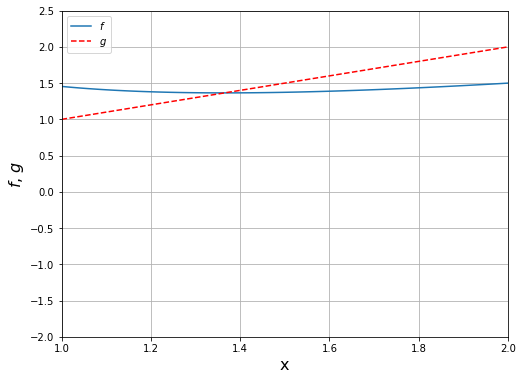

In [87]:
x = np.linspace(1, 2, 100)
g1 = x - x**3 - 4*x**2 + 10
#g2 = np.sqrt((10/4) - 4*x)
g3 = 0.5 * np.sqrt(10 - x**3)
g4 = np.sqrt(10/(4+x))
g5 = x - ((x**3 + 4*x**2 - 10)/(3*x**2 + 8*x))

plt.figure(figsize=(8,6))
plt.plot(x, g5, x, x, 'r--')
plt.xlabel('x', fontsize=16)
plt.ylabel("$f$, $g$", fontsize=16)
# plt.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
plt.ylim([-2, 2.5])
plt.xlim([1, 2])
plt.grid()
plt.legend(["$f$", "$g$"], loc='best');

Cek nilai $|g'(x)|$ untuk masing-masing $g_1, g_2, g_3, g_4, g_5$.

In [88]:
# g1
x = sympy.symbols('x')
g_simbol = x - x**3 - 4*x**2 + 10
g_aksen = sympy.diff(g_simbol, x)
print(g_aksen)

ksi = 1
g_aksen_eval = sympy.lambdify(x, g_aksen, "numpy")
print(np.abs(g_aksen_eval(ksi)))

-3*x**2 - 8*x + 1
10


In [89]:
# g3
x = sympy.symbols('x')
g_simbol = 0.5 * sympy.sqrt(10 - x**3)
g_aksen = sympy.diff(g_simbol, x)
print(g_aksen)

ksi = 1
g_aksen_eval = sympy.lambdify(x, g_aksen, "numpy")
print(np.abs(g_aksen_eval(ksi)))

-0.75*x**2/sqrt(10 - x**3)
0.25


In [90]:
# g4
x = sympy.symbols('x')
g_simbol = sympy.sqrt(10/(4+x))
g_aksen = sympy.diff(g_simbol, x)
print(g_aksen)

ksi = 1
g_aksen_eval = sympy.lambdify(x, g_aksen, "numpy")
print(np.abs(g_aksen_eval(ksi)))

-sqrt(10)*sqrt(1/(x + 4))/(2*(x + 4))
0.1414213562373095


In [91]:
# g5
x = sympy.symbols('x')
g_simbol = x - ((x**3 + 4*x**2 - 10)/(3*x**2 + 8*x))
g_aksen = sympy.diff(g_simbol, x)
print(g_aksen)

ksi = 1
g_aksen_eval = sympy.lambdify(x, g_aksen, "numpy")
print(np.abs(g_aksen_eval(ksi)))

-(-6*x - 8)*(x**3 + 4*x**2 - 10)/(3*x**2 + 8*x)**2
0.5785123966942148


Hasil iterasi fixed point untuk $g_1, g_2, g_3, g_4, g_5$:

In [93]:
g1 = lambda x: x - x**3 - 4*x**2 + 10
g3 = lambda x: 0.5 * np.sqrt(10 - x**3)
g4 = lambda x: np.sqrt(10/(4+x))
g5 = lambda x: x - ((x**3 + 4*x**2 - 10)/(3*x**2 + 8*x))

iterasi_fixed_point(g1, 1)

     p		     g(p)      	residual
------------------------------------------------
  6.0000	 -344.0000	    5.0000	
-344.0000	40233906.0000	  350.0000	
40233906.0000	-65129333514558058266624.0000	40234250.0000	
-65129333514558058266624.0000	276267566256213176812460591377636390697531392742540224134413008502784.0000	65129333514558100209664.0000	
276267566256213176812460591377636390697531392742540224134413008502784.0000	-21085781678484218373029710589143631921317875000289319058960190154839362740347082366049129581190236367284319210288916507514866804543042709750411734218555823868097599405777061398665815022859218193480385822720.0000	276267566256213176812460591377636390697531392742540224134413008502784.0000	


OverflowError: ignored

In [94]:
iterasi_fixed_point(g4, 1)

     p		     g(p)      	residual
------------------------------------------------
  1.4142	    1.3590	    0.4142	
  1.3590	    1.3660	    0.0552	
  1.3660	    1.3651	    0.0070	
  1.3651	    1.3652	    0.0009	
  1.3652	    1.3652	    0.0001	
  1.3652	    1.3652	    0.0000	


In [95]:
iterasi_fixed_point(g5, 1)

     p		     g(p)      	residual
------------------------------------------------
  1.4545	    1.3689	    0.4545	
  1.3689	    1.3652	    0.0856	
  1.3652	    1.3652	    0.0037	


## Metode Newton
* Metode Newton atau yang lebih dikenal sebagai __Newton-Raphson__ adalah salah satu metode yang _powerful_ untuk menyelesaikan masalah pencarian akar pada persamaan nonlinear.
* Metode ini dibentuk dengan memanfaatkan polinomial Taylor order pertama untuk merepresentasikan suatu fungsi $f(x)$.

__Definisi__: Diberikan $f\in C^2[a,b]$ dan terdapat $p_0 \in [a,b]$ sebagai nilai aproksimasi untuk akar $p$ sedemikian sehingga $f'(p_0) \neq 0$ dan $|p-p_0|$ kecil. Perhatikan polinomial Taylor order pertama untuk suatu $f(x)$ terhadap titik $p_0$ dan $x = p$,

$$
f(p) = f(p_0) + (p-p_0)f'(p_0)+\frac{(p-p_0)^2}{2}f''(\xi(p)), \hspace{10mm} \xi(p) \in (p,p_0).
$$

Karena $p$ adalah akar maka $f(p)=0$, 

$$
0 = f(p_0) + (p-p_0)f'(p_0)+\frac{(p-p_0)^2}{2}f''(\xi(p)), \hspace{10mm} \xi(p) \in (p,p_0).
$$

Karena diasumsikan $|p-p_0|$ kecil, maka $(p-p_0)^2 \approx 0$, sehingga

$$
0 = f(p_0) + (p-p_0)f'(p_0)
$$

atau

$$
p \approx p_0 - \frac{f(p_0)}{f'(p_0)} \equiv p_1.
$$

Dengan tebakan awal $p_0$, kita dapatkan suatu barisan solusi $\{p_k\}_{k=0}^{\infty}$, sehingga bentuk iteratif untuk metode Newton dapat kita tuliskan

$$
p_k = p_{k-1} - \frac{f(p_{k-1})}{f'(p_{k-1})},
$$

untuk $k = 1,2,\cdots$.

__Stopping Criteria__:
* $|p_k - p_{k-1}| < \varepsilon$
* $\frac{|p_k - p_{k-1}|}{|p_k|} < \varepsilon$
* $|f(p_k)| < \varepsilon$
* iterasi maksimum sudah terpenuhi.

### Implementasi Metode Newton

In [96]:
def newton(func, dfunc, p0, N=100, epsilon=1e-5):
    print('     p\t\t     f(p)      \tresidual')
    print('------------------------------------------------')
    f = func
    df = dfunc
    for i in range(N):
        p = p0 - f(p0)/df(p0)
        if (np.abs(p-p0) < epsilon):
            break    
        print('{:8.4f}\t{:10.4f}\t{:10.5E}\t'.format(p, f(p), np.abs(p-p0)))
        p0 = p
    return p

__Contoh 1__:

Tentukan akar dari fungsi $f(x)=\cos(x) - x$.

In [97]:
f = lambda x: np.cos(x) - x

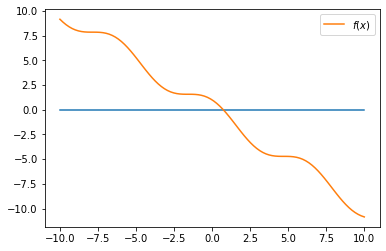

In [98]:
X = np.linspace(-10,10, 100)
g = np.zeros(X.size)
plt.plot(X,g);
plt.plot(X, f(X), label='$f(x)$');
plt.legend();

Implementasikan metode newton untuk mencari akar dari $f(x)$. Pertama, kita cari $f'(x)$ terlebih dahulu

In [99]:
x = sympy.symbols('x')
f_simbol = sympy.cos(x) - x 
f_diff = sympy.diff(f_simbol, x)
f_aksen = sympy.lambdify(x, f_diff, "numpy")


Kemudian pilih tebakan awal, misal $p_0=1$ dan cari akar menggunakan metode Newton 

In [102]:
p0 = 1
p = newton(f, f_aksen, p0, epsilon=1e-10)


     p		     f(p)      	residual
------------------------------------------------
  0.7504	   -0.0189	2.49636E-01	
  0.7391	   -0.0000	1.12510E-02	
  0.7391	   -0.0000	2.77575E-05	
  0.7391	    0.0000	1.70123E-10	


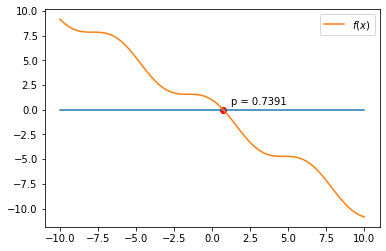

In [105]:
X = np.linspace(-10,10, 100)
g = np.zeros(X.size)
plt.plot(X,g);
plt.plot(X, f(X), label='$f(x)$');
plt.annotate('p = {:4.4f}'.format(p),(p+0.5,0.5))
plt.scatter(p, 0, color='red');
plt.legend();

### Analisis Kekonvergenan Metode Newton

Misalkan $p$ adalah akar sehingga $f(p)=0$ dan $p=g(p)$. Definisikan error

$$ e_k = |p_k - p| = |g(p_{k-1}) - g(p)|.$$

Berdasarkan Ekspansi Taylor untuk $g(p_{k-1})$ di $x=p$, maka

$$
g(p_{k-1}) = g(p) + (p_{k-1} - p) g'(p) + \frac{(p_{k-1} - p)^2}{2}g''(\xi), \hspace{10mm} \xi \in (p_{k-1}, p).
$$

Pandang sebagai fixed point yang 'optimal'

$$x = g(x) = x-\frac{f(x)}{f'(x)}$$

maka 

$$
g'(x) = 1-\left[ \frac{f'(x)f'(x) - f(x) f''(x)}{(f'(x))^2} \right] = \frac{f(x)f''(x)}{(f'(x))^2}
$$

Jika kita asumsikan $p$ adalah akar maka $f(p) = 0$ sehingga

$$
g'(p) = \frac{f(p)f''(p)}{(f'(p))^2} = 0.
$$

Dengan demikian, karena $g'(p)=0$ maka

$$g(p_{k-1}) = g(p) +  \frac{(p_{k-1} - p)^2}{2}g''(\xi), \hspace{10mm} \xi \in (p_{k-1}, p).$$

Subtitusikan bentuk $g(p_{k-1})$ ke persamaan $e_k$, maka didapat

$$
\begin{array}{cc}
e_k &=& |g(p_{k-1}) - g(p)| \\
     &=& \left|g(p) +  \frac{(p_{k-1} - p)^2}{2}g''(\xi) - g(p) \right| \\
     &=& \left|\frac{(p_{k-1} - p)^2}{2}g''(\xi) \right| \\
     &\leq& \left|(p_{k-1} - p)^2 \right|  \left| \frac{g''(\xi)}{2} \right| \\
     &\leq& \left|(e_{k-1})^2 \right|  \left| \frac{g''(\xi)}{2} \right| \\
\end{array}
$$

Jika kita misalkan $M = \left| \frac{g''(\xi)}{2} \right|$ maka 

> $$
e_k \leq M e_{k-1}^{2}
$$

Jadi, tingkat konvergensi dari metode Newton adalah __kuadratik__.

## Metode Secant

Kelemahan dari metode Newton adalah kita perlu untuk mencari turunan dari $f(x)$. Hal ini dapat menimbulkan masalah jika kita menemukan bentuk $f(x)$ yang kompleks atau dengan kata lain turunannya sulit ditemukan. Berdasarkan definisi dari turunan, 

$$
f'(x) = \lim_{\Delta x \rightarrow 0} \frac{f(x) - f(x + \Delta x)}{\Delta x}
$$

kita dapat mengaproksimasi turunan dari $f(x)$ yaitu

$$
f'(x_k) \approx \frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}}.
$$

Panggil skema iterasi Newton:

$$
p_k = p_{k-1} - \frac{f(p_{k-1})}{f'(p_{k-1})}
$$

Jika terdapat $p_{k-2}$ yang dekat dengan $p_{k-1}$, maka

$$
f'(p_{k-1}) \approx \frac{f(p_{k-1}) - f(p_{k-2})}{p_{k-1} - p_{k-2}}.
$$

Kemudian subtitusikan $f'(p_{k-1})$ ke skema iterasi Newton, maka kita dapatkan skema iterasi untuk __Metode Secant__

$$
p_k = p_{k-1} - \frac{f(p_{k-1})(p_{k-1} - p_{k-2})}{f(p_{k-1}) - f(p_{k-2})}
$$

__Catatan__: Metode Secant membutuhkan dua tebakan awal $p_0$ dan $p_1$ yang dekat. 


### Implementasi Metode Secant

In [110]:
def secant(func, p0, p1, N=100, epsilon=1e-5):
    print('     p\t\t     f(p)      \tresidual')
    print('------------------------------------------------')
    q0 = func(p0)
    q1 = func(p1)
    for i in range(N):
        p = p1 - q1*(p1-p0)/(q1-q0)
        if (np.abs(p-p1) < epsilon):
            break    
        print('{:8.4f}\t{:10.4f}\t{:10.5E}\t'.format(p, f(p), np.abs(p-p0)))
        p0 = p1
        q0 = q1
        p1 = p
        q1 = func(p)
    return p

__Contoh 1__

Tentukan akar dari fungsi $f(x)=\cos(x) - x$

In [112]:
f = lambda x: np.cos(x) - x
p0 = 0
p1 = 1
p = secant(f, p0, p1, epsilon=1e-10)

     p		     f(p)      	residual
------------------------------------------------
  0.6851	    0.0893	6.85073E-01	
  0.7363	    0.0047	2.63701E-01	
  0.7391	   -0.0001	5.40460E-02	
  0.7391	    0.0000	2.78611E-03	
  0.7391	    0.0000	3.42287E-05	


### Analisis Kekonvergenan Metode Secant
__Klaim__: Metode Secant memiliki tingkat konvergensi __superlinear__ atau dapat ditulis

$$e_{k} \leq e_{k-1}^{1.618}.$$

Pembuktiannya dapat dilihat di [sini](https://nptel.ac.in/content/storage2/courses/122104019/numerical-analysis/Rathish-kumar/ratish-1/f3node5.html).
